In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

In [2]:
def remove_extreme_values(df):
#     for c in df.columns:
#         if c.find('_estimate') != -1:
#             df = df[df[c] > df[c].min()+0.0001]
#             df = df[df[c] < df[c].max()-0.0001]
    return df

In [3]:
recovery_2d_100 = pd.read_csv('../_Parameter_recovery/_Series/Series_2d_recovery_100.csv', index_col=0)
# recovery_3d_10 = pd.read_csv('../_Parameter_recovery/_Series/Series_3d_recovery_10.csv', index_col=0)
# recovery_4d_50 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_4d_recovery_10.csv', index_col=0))

recovery_2d_25 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_2d_recovery_25.csv', index_col=0))
# recovery_3d_25 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_3d_recovery_25.csv', index_col=0))
# recovery_4d_25 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_4d_recovery_25.csv', index_col=0))

recovery_2d_50 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_2d_recovery_50.csv', index_col=0))
# recovery_3d_50 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_3d_recovery_50.csv', index_col=0))
# recovery_4d_50 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_4d_recovery_50.csv', index_col=0))

recovery_2d_75 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_2d_recovery_75.csv', index_col=0))
# recovery_3d_75 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_3d_recovery_250.csv', index_col=0))
# recovery_4d_75 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Series/Series_4d_recovery_250.csv', index_col=0))

recovery_2d = [recovery_2d_25, recovery_2d_50, recovery_2d_75, recovery_2d_100]
# recovery_3d = [recovery_3d_10, recovery_3d_20]#, recovery_3d_250, recovery_3d_150]
# recovery_4d = [recovery_4d_50, recovery_4d_100, recovery_4d_250, recovery_4d_150]

mu_2d_true = [np.append([recovery_2d[i]['mu1_true'], 
                         recovery_2d[i]['mu2_true']], 0) for i in range(4)]
mu_2d_estimate = [np.append([recovery_2d[i]['mu1_estimate'], 
                          recovery_2d[i]['mu2_estimate']], 0) for i in range(4)]

# mu_3d_true = [np.append([recovery_3d[i]['mu1_true'], 
#                       recovery_3d[i]['mu2_true'], 
#                       recovery_3d[i]['mu3_true']], 0) for i in range(2)]
# mu_3d_estimate = [np.append([recovery_3d[i]['mu1_estimate'], 
#                           recovery_3d[i]['mu2_estimate'], 
#                           recovery_3d[i]['mu3_estimate']], 0) for i in range(2)]

# mu_4d_true = [np.append([recovery_4d[i]['mu1_true'], 
#                       recovery_4d[i]['mu2_true'], 
#                       recovery_4d[i]['mu3_true'],
#                       recovery_4d[i]['mu4_true']], 0) for i in range(4)]
# mu_4d_estimate = [np.append([recovery_4d[i]['mu1_estimate'], 
#                           recovery_4d[i]['mu2_estimate'], 
#                           recovery_4d[i]['mu3_estimate'],
#                           recovery_4d[i]['mu4_estimate']], 0) for i in range(4)]

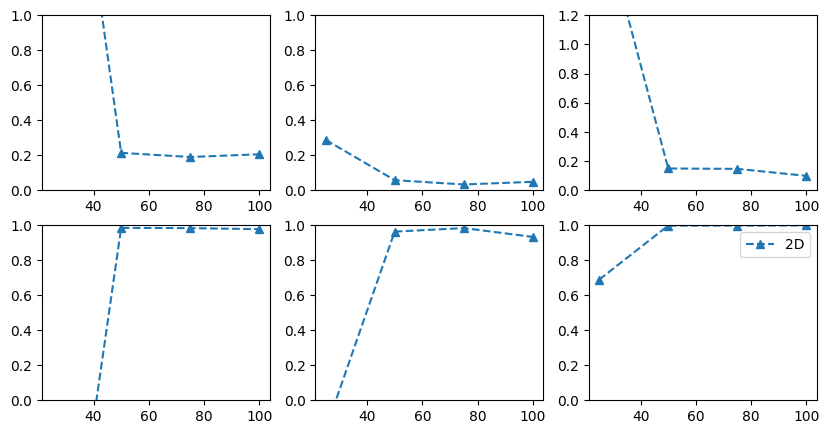

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.ylim([0, 1])
prms = 'threshold'
plt.plot([25, 50, 75, 100], 
         [rmse(y_true=recovery_2d[i]['{}_true'.format(prms)],
               y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

# plt.plot([10, 20], 
#          [rmse(y_true=recovery_3d[i]['{}_true'.format(prms)],
#                y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(2)],
#          '--^');

# plt.plot([50, 100, 150, 250], [rmse(y_true=recovery_4d[i]['{}_true'.format(prms)],
#                          y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
#          '--^');

plt.subplot(234)
plt.ylim([0, 1])
plt.plot([25, 50, 75, 100], 
         [r2_score(y_true=recovery_2d[i]['{}_true'.format(prms)],
                   y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

# plt.plot([10, 20], 
#          [r2_score(y_true=recovery_3d[i]['{}_true'.format(prms)],
#                    y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(2)],
#          '--^');

# plt.plot([50, 100, 150, 250], 
#          [r2_score(y_true=recovery_4d[i]['{}_true'.format(prms)],
#                    y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
#          '--^');

plt.subplot(232)
plt.ylim([0, 1])
prms = 'ndt'
plt.plot([25, 50, 75, 100], 
         [rmse(y_true=recovery_2d[i]['{}_true'.format(prms)],
               y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

# plt.plot([10, 20], 
#          [rmse(y_true=recovery_3d[i]['{}_true'.format(prms)],
#                y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(2)],
#          '--^');

# plt.plot([50, 100, 150, 250], [rmse(y_true=recovery_4d[i]['{}_true'.format(prms)],
#                          y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
#          '--^');

plt.subplot(235)
plt.ylim([0, 1])
plt.plot([25, 50, 75, 100], 
         [r2_score(y_true=recovery_2d[i]['{}_true'.format(prms)],
                   y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

# plt.plot([10, 20], 
#          [r2_score(y_true=recovery_3d[i]['{}_true'.format(prms)],
#                    y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(2)],
#          '--^');

# plt.plot([50, 100, 150, 250], 
#          [r2_score(y_true=recovery_4d[i]['{}_true'.format(prms)],
#                    y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
#          '--^');

plt.subplot(233)
plt.ylim([0, 1.2])
plt.plot([25, 50, 75, 100], 
         [rmse(mu_2d_true[i],mu_2d_estimate[i]) for i in range(4)],
         '--^', label='2D');

# plt.plot([10, 20], 
#          [rmse(mu_3d_true[i], mu_3d_estimate[i]) for i in range(2)],
#          '--^', label='3D');

# plt.plot([50, 100, 150, 250], 
#          [rmse(mu_4d_true[i], mu_4d_estimate[i]) for i in range(4)],
#          '--^', label='4D');

plt.subplot(236)
plt.ylim([0, 1])
plt.plot([25, 50, 75, 100], 
         [r2_score(mu_2d_true[i],mu_2d_estimate[i]) for i in range(4)],
         '--^', label='2D');

# plt.plot([10, 20], 
#          [r2_score(mu_3d_true[i], mu_3d_estimate[i]) for i in range(2)],
#          '--^', label='3D');

# plt.plot([50, 100, 150, 250], [r2_score(mu_4d_true[i], mu_4d_estimate[i]) for i in range(4)],
#          '--^', label='4D');

plt.legend();